In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import data from Excel sheet
data = pd.read_excel('Data Analytics Python v1.00.xlsx',sheet_name = 'Case Study Data' , skiprows= 1)

In [4]:
print(data.shape,'\n')# The number of rows and columns

data.head()

(84080, 14) 



,Customer ID,Title,Specialty Code,Specialty Description,State,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,10000,MD,FM,FAMILY MEDICINE,SC,0,0,17,0,0,0,NaN,3.0,131
1,10001,MD,CD,CARDIOVASCULAR DISEASES,SC,0,0,17,0,0,0,NaN,NaN,56
2,10002,MD,IM,INTERNAL MEDICINE,AL,0,0,17,0,0,0,NaN,NaN,161
3,10003,MD,FM,FAMILY MEDICINE,AL,6,0,17,0,0,0,NaN,NaN,180
4,10004,MD,CD,CARDIOVASCULAR DISEASES,AL,2,0,17,0,0,0,NaN,4.0,44


In [5]:
#NAs 
data.isna().sum()

Customer ID                                     0
Title                                        6401
Specialty Code                                757
Specialty Description                         757
State                                         757
Call Attempts                                   0
Calls Successfully Completed                    0
Emails Sent                                     0
Emails Opened                                   0
Faxes Sent                                      0
Brand 1 Sales (Company's Brand)                 0
Brand 2 Sales (Competitor Brand)            48091
Total Branded Market Sales                  42385
Total Market (Branded + Unbranded) Sales        0
dtype: int64

Total Market (Branded + Unbranded) Sales and Brand 1 Sales (Company's Brand) columns can be used for imputing Brand 2 Sales (Competitor Brand) and Total Branded Market Sales, but they are not so important in our Analysis!

In [6]:
data.drop(columns=["Brand 2 Sales (Competitor Brand)","Total Branded Market Sales","Total Market (Branded + Unbranded) Sales"],inplace=True)

In [7]:
data.columns

Index(['Customer ID', 'Title', 'Specialty Code', 'Specialty Description',
       'State', 'Call Attempts', 'Calls Successfully Completed', 'Emails Sent',
       'Emails Opened', 'Faxes Sent', 'Brand 1 Sales (Company's Brand)'],
      dtype='object')

In [8]:
## Imputing missing values:

def impute_nas(df):
    
    remaining_nas = df.isna().sum() > 0
    
    remaining_nas = remaining_nas[remaining_nas == True].index.tolist()
    
    for i in remaining_nas:
        
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            
            df.loc[df[i].isnull(),i] = np.round(df[i].mean(),0)
            
        elif df[i].dtype == 'O':
            
            df.loc[df[i].isnull(),i] = df[i].mode()[0]
            
        else:
            pass
        
    if df.isna().sum().any() == False:
        
        print('Done!')    
        
impute_nas(data)

Done!


<b>Any relation between the sales of the competitor of rivals!</b>

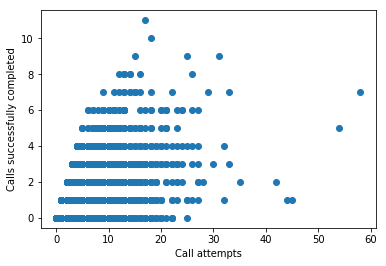

In [9]:
plt.scatter(y=data["Calls Successfully Completed"],x=data["Call Attempts"])
plt.ylabel('Calls successfully completed')
plt.xlabel('Call attempts')
plt.show()

As the call attempts increase, the customers respond to the calls better but after a point, less people have responded to the calls, which probably could be because they might have felt irritated by multiple calls.

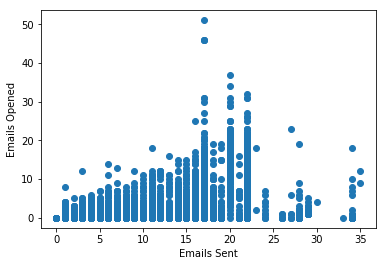

In [10]:
plt.scatter(y=data["Emails Opened"],x=data["Emails Sent"])
plt.ylabel('Emails Opened')
plt.xlabel('Emails Sent')
plt.show()

Same relation could be seen with Emails sent as after around 23 emails, people seem to be opening the emails less.

Choosing the right number of clusters for clustering:

In [11]:
STS = StandardScaler()

In [12]:
X_ = data.copy()
X_ = X_.drop(columns=['Specialty Description'])

X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])


X_ = pd.get_dummies(X_)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
k_ = []
wcss = []

for k in range(2,10):
    KM_ = KMeans(n_clusters=k, n_init=20, random_state=123,algorithm='elkan').fit(X=X_)
    k_.append(k)
    wcss.append(KM_.inertia_)

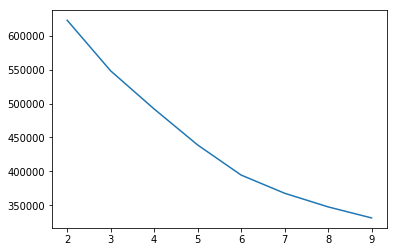

In [14]:
plt.plot(k_,wcss)
plt.show()

In [15]:
X = data.copy()

In [16]:
X = pd.get_dummies(X)

STS = StandardScaler()

X[X.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X[X.select_dtypes(['int64','float64']).columns.tolist()])

X.head()

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Customer ID,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Title_AGA,Title_AGN,Title_AGP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,-1.732030,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.731989,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.731948,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.731907,2.548959,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.731865,0.627101,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X.head(10)

,Customer ID,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Title_AGA,Title_AGN,Title_AGP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,-1.732030,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.731989,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.731948,-0.333828,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.731907,2.548959,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.731865,0.627101,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.731824,-0.333828,-0.225944,-1.585725,0.909337,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1.731783,1.588030,3.800208,0.637789,-0.231566,3.322969,-0.085835,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-1.731742,-0.333828,-0.225944,0.637789,4.332044,-0.223668,-0.085835,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,-1.731701,2.548959,3.800208,-0.334998,-0.231566,1.549650,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1.731659,1.107565,-0.225944,0.637789,-0.231566,-0.223668,-0.085835,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
KM = KMeans(n_clusters = 6, n_init=20, random_state=123,algorithm='elkan').fit(X=X_)

In [19]:
KM.inertia_

394626.1897449014

In [20]:
data['Clusters_on_Title_6'] = KM.labels_

In [21]:
for index,frame in data.groupby('Clusters_on_Title_6'):
    print('Cluster # :',index)
    print('Avg calls attempted',frame.loc[:,'Call Attempts'].mean())
    print('Avg calls successfully completed',frame.loc[:,'Calls Successfully Completed'].mean())
    print('Closeness :', frame['Call Attempts'].mean() - frame['Calls Successfully Completed'].mean())
    print('\n')

Cluster # : 0
Avg calls attempted 0.30201316298877273
Avg calls successfully completed 0.029965156794425088
Closeness : 0.27204800619434766


Cluster # : 1
Avg calls attempted 0.28128632313056956
Avg calls successfully completed 0.027266563347539713
Closeness : 0.2540197597830298


Cluster # : 2
Avg calls attempted 0.45622979358368565
Avg calls successfully completed 0.044827157423526484
Closeness : 0.41140263616015915


Cluster # : 3
Avg calls attempted 0.6767546683837733
Avg calls successfully completed 0.0824211204121056
Closeness : 0.5943335479716677


Cluster # : 4
Avg calls attempted 7.810758082497213
Avg calls successfully completed 1.7667224080267558
Closeness : 6.044035674470457


Cluster # : 5
Avg calls attempted 3.6109215017064846
Avg calls successfully completed 0.6518771331058021
Closeness : 2.9590443686006824




Customers of cluster number 0,1,2 and 3 seemed to respond to calls better than any other groups, so they could be reached out by calls.

In [22]:
for index,frame in data.groupby('Clusters_on_Title_6'):
    print('Cluster # :',index)
    print('Avg emails sent',frame['Emails Sent'].mean())
    print('Avg emails opened',frame['Emails Opened'].mean())
    print('Closesness :', frame['Emails Sent'].mean() - frame['Emails Opened'].mean())
    print('\n')

Cluster # : 0
Avg emails sent 16.137475803329462
Avg emails opened 0.2218350754936121
Closesness : 15.91564072783585


Cluster # : 1
Avg emails sent 0.9156819062378923
Avg emails opened 0.08131538163502518
Closesness : 0.8343665246028671


Cluster # : 2
Avg emails sent 16.323271574235264
Avg emails opened 0.2608182044267595
Closesness : 16.062453369808505


Cluster # : 3
Avg emails sent 19.07533805537669
Avg emails opened 10.721184803605924
Closesness : 8.354153251770766


Cluster # : 4
Avg emails sent 13.687569676700111
Avg emails opened 0.4358974358974359
Closesness : 13.251672240802675


Cluster # : 5
Avg emails sent 13.38566552901024
Avg emails opened 0.40273037542662116
Closesness : 12.982935153583618




<b>Customers in cluster 2,0,4,5 and 3 seemed to open more mails that were sent to them than other people in the data

<b>Customers in cluster 1 dont seem to respond either the mails or calls and we do not know how people feel about the faxes they have received by us</b>